In [1]:
! pip install -q kaggle

In [2]:
# Easiest way to download kaggle data in Google Colab
# https://www.kaggle.com/general/74235

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              234KB  2021-08-04 12:58:15          10212  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           6240  
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           2320  
dhruvildave/wikibooks-dataset                               Wikibooks Dataset                                   2GB  2021-07-03 18:37:20           2558  
fatiimaezzahra/famous-iconic-women                          Famous Iconic Wo

In [5]:
!kaggle datasets download -d gti-upm/leapgestrecog

100% 2.13G/2.13G [00:25<00:00, 33.9MB/s]
100% 2.13G/2.13G [00:25<00:00, 88.4MB/s]


In [6]:
! unzip leapgestrecog.zip -d leapgestrecog

Streaming output truncated to the last 5000 lines.
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0001.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0002.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0003.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0004.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0005.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0006.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0007.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0008.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0009.png  
  inflating: leapgestrecog/leapgestrecog/leapGestRecog/07/06_index/frame_07_06_0010.png  
  inflating: leapgestrecog/leapgestrecog/leapGest

In [7]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [8]:
!ls ./leapgestrecog/leapGestRecog/

00  01	02  03	04  05	06  07	08  09


In [9]:
!tree -d ./leapgestrecog/leapGestRecog/

./leapgestrecog/leapGestRecog/
├── 00
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_index
│   ├── 07_ok
│   ├── 08_palm_moved
│   ├── 09_c
│   └── 10_down
├── 01
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_index
│   ├── 07_ok
│   ├── 08_palm_moved
│   ├── 09_c
│   └── 10_down
├── 02
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_index
│   ├── 07_ok
│   ├── 08_palm_moved
│   ├── 09_c
│   └── 10_down
├── 03
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_index
│   ├── 07_ok
│   ├── 08_palm_moved
│   ├── 09_c
│   └── 10_down
├── 04
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_index
│   ├── 07_ok
│   ├── 08_palm_moved
│   ├── 09_c
│   └── 10_down
├── 05
│   ├── 01_palm
│   ├── 02_l
│   ├── 03_fist
│   ├── 04_fist_moved
│   ├── 05_thumb
│   ├── 06_in

In [10]:
!ls 

kaggle.json  leapgestrecog  leapgestrecog.zip  sample_data


In [11]:
%matplotlib inline

import os

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

# Sklearn
from sklearn.model_selection import train_test_split # Helps with organizing data for training
from sklearn.metrics import confusion_matrix # Helps present results as a confusion-matrix

print(tf.__version__)

2.5.0


In [34]:
imagepaths = []

# Go through all the files and subdirectories inside a folder and save path to images inside list
for root, dirs, files in os.walk("leapgestrecog/leapgestrecog", topdown=False):
    for name in files:
        path = os.path.join(root, name)
        if path.endswith("png"): # We want only the images
            imagepaths.append(path)

print(len(imagepaths))

20000


In [35]:
imagepaths[:3]

['leapgestrecog/leapgestrecog/leapGestRecog/09/04_fist_moved/frame_09_04_0005.png',
 'leapgestrecog/leapgestrecog/leapGestRecog/09/04_fist_moved/frame_09_04_0125.png',
 'leapgestrecog/leapgestrecog/leapGestRecog/09/04_fist_moved/frame_09_04_0036.png']

In [36]:
def plot_image(path):
    
    img = cv2.imread(path) # Reads the image into a numpy.array
    img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (RGB)
    print(img_cvt.shape) # Prints the shape of the image just to check
    plt.grid(False) # Without grid so we can see better
    plt.imshow(img_cvt) # Shows the image
    plt.xlabel("Width")
    plt.ylabel("Height")
    plt.title("Image : " + path)

(240, 640)


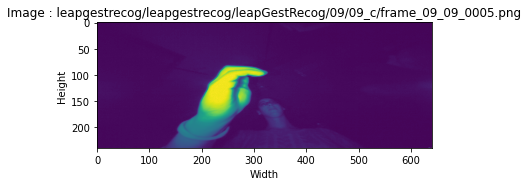

In [37]:
plot_image(imagepaths[540])

In [38]:
X = [] # Image data
y = [] # Labels

# Loops through imagepaths to load images and labels into arrays
for path in imagepaths:
    img = cv2.imread(path) # Reads image and returns np.array
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Converts into the corret colorspace (GRAY)
    img = cv2.resize(img, (320, 120)) # Reduce image size so training can be faster
    X.append(img)
  
    # Processing label in image path : /kaggle/input/leapgestrecog/leapGestRecog/07/02_l/frame_07_02_0067.png
    category = path.split("/")[3]
    label = int(category.split("_")[0][1]) # We need to convert 10_down to 00_down, or else it crashes
    y.append(label)

# Turn to np.array to speed up train_test_split
X = np.array(X, dtype="uint8")
X = X.reshape(len(imagepaths), 120, 320, 1) # Needed to reshape so CNN knows it's different images
y = np.array(y)

print("Images loaded: ", len(X))
print("Labels loaded: ", len(y))

print(y[0], imagepaths[0]) # Debugging

Images loaded:  20000
Labels loaded:  20000
9 leapgestrecog/leapgestrecog/leapGestRecog/09/04_fist_moved/frame_09_04_0005.png


In [39]:
ts = 0.3 # Percentage of images that we want to use for testing. The rest is used for training.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ts, random_state=42)

In [40]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten

In [41]:
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(120, 320, 1))) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 116, 316, 32)      832       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 58, 158, 32)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 156, 64)       18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 28, 78, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 26, 76, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 38, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 31616)            

In [43]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [44]:
model.fit(X_train, y_train, epochs=5, batch_size=64, verbose=2, validation_data=(X_test, y_test))

Epoch 1/5
219/219 - 933s - loss: 0.5661 - accuracy: 0.9325 - val_loss: 0.0182 - val_accuracy: 0.9920
Epoch 2/5
219/219 - 931s - loss: 0.0203 - accuracy: 0.9911 - val_loss: 0.0138 - val_accuracy: 0.9925
Epoch 3/5
219/219 - 940s - loss: 0.0249 - accuracy: 0.9905 - val_loss: 0.0174 - val_accuracy: 0.9912
Epoch 4/5
219/219 - 937s - loss: 0.0154 - accuracy: 0.9921 - val_loss: 0.0124 - val_accuracy: 0.9932
Epoch 5/5
219/219 - 916s - loss: 0.0132 - accuracy: 0.9921 - val_loss: 0.0135 - val_accuracy: 0.9923


In [45]:
model.save('handrecognition_model.h5')

In [46]:
import time

In [47]:
ts = time.time()
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy: {:2.2f}%'.format(test_acc*100))
te = time.time()

188/188 [==============================] - 92s 487ms/step - loss: 0.0135 - accuracy: 0.9923
Test accuracy: 99.23%


In [48]:
te-ts

91.67476844787598